Ashton Carter

Download the data using this link: download the data. (Note: Original data source)

Explore the data - what do you need to do to clean this data?

Are there missing values in this dataset? Some stores might not report all the data due to technical glitches or other issues. If so, deal with these appropriately.

Here are a few resources to help you consider more advanced ways to deal with missing values in your dataset (check out the optional additional 

Pandas resources at the end of this Chapter for more resources on this):

Missing Data, its types, and statistical methods to deal with it
6 Different Ways to Compensate for Missing Values In a Dataset

Dealing with missing data: Key assumptions and methods for applied analysis

Feel free to use any other resources or techniques you find online that you think are appropriate/useful

What are some summary statistics, aggregate information, or other useful trends you can see from the data using Pandas?

Commit your work to GitHub. Watch this video if you are unsure of how to do this:

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [164]:


file_path = ('/content/drive/MyDrive/Panda_eat_bamboo/sales_predictions.csv')

sales = pd.read_csv(file_path)

sales.info()
sales.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [165]:

#consolidating data entries that are presumably the same

sales.loc[:,'Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('LF','Low Fat')
sales.loc[:,'Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('low fat','Low Fat')
sales.loc[:,'Item_Fat_Content'] = sales['Item_Fat_Content'].str.replace('reg','Regular')
sales.loc[:,'Outlet_Size'] = sales['Outlet_Size'].fillna('Missing')

sales.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2157.711534
Regular,2224.561170


In [ ]:
# I decided to just drop the columns instead of imputing them since I do not fully understand the process of imputing 
# and its implications, but I do understand dropping the feature entirely.  In the future I would like to learn more and try a different approach
# I thought filling with 0 and adding a missing flag would be a good idea but it skews the model in a way that doesn't help with prediction

# Did not report outlet size in 1998, 2002, or 2007

sizeF = sales['Item_Weight'].isna()
size1F = sales['Outlet_Size'] == 'Small'
size2F = sales['Outlet_Size']== 'Medium'
size3F = sales['Outlet_Size']== 'High'



out1F = sales['Outlet_Identifier'] == 'OUT013'
out2F = sales['Outlet_Identifier'] == 'OUT018'
out3F = sales['Outlet_Identifier'] == 'OUT035'
out4F = sales['Outlet_Identifier'] == 'OUT046'
out5F = sales['Outlet_Identifier'] == 'OUT049'
out6F = sales['Outlet_Identifier'] == 'OUT045'
out7F = sales['Outlet_Identifier'] == 'OUT010'
out8F = sales['Outlet_Identifier'] == 'OUT017'
out9F = sales['Outlet_Identifier'] == 'OUT027'
out10F = sales['Outlet_Identifier'] == 'OUT019'
grocF = sales['Outlet_Type'] == 'Supermarket Type1'
mrpF = sales['Item_MRP'] > 150
salesF = sales['Item_Outlet_Sales'] < 200

test = sales[sizeF]
test1 = sales[out1F]
test2 = sales[out2F]
test3 = sales[out3F]
test4 = sales[out4F]
test5 = sales[out5F]
test6 = sales[out6F]
test7 = sales[out7F]
test8 = sales[out8F]
test9 = sales[out9F]
test10 = sales[out10F]

#test1 = sales[out6F|out8F|out9F]
#test1 = sales[sales.Outlet_Identifier.isin(["OUT017", "OUT010", "OUT045"])]
#test1['Outlet_Size'].unique()
# 13 = high, 27 med (no weight), 35 small, 46 small, 49 med, 45 NA, 18 med, 17 NA, 10 na , 19 small (also no weight)
#print(sales['Outlet_Establishment_Year'].value_counts())
#st1 = test1.sort_values(by='Outlet_Identifier')
#print(len(test1['Item_Weight']))
#print(test['Outlet_Identifier'].value_counts())
#print(sales['Outlet_Size'].value_counts())
print(test1['Outlet_Identifier'].value_counts())
#print(test2['Outlet_Identifier'].value_counts())
#print(test3['Outlet_Identifier'].value_counts())

#sales = sales.drop(columns= ['Item_Weight', 'Outlet_Size', 'Item_Identifier'])




OUT013    932
Name: Outlet_Identifier, dtype: int64


In [ ]:
FQF = sales['Item_Outlet_Sales'] < 834
SQF = sales['Item_Outlet_Sales'] >= 834
SQF1 = sales['Item_Outlet_Sales'] < 1794
TQF = sales['Item_Outlet_Sales'] >= 1794
TQF1 = sales['Item_Outlet_Sales'] < 3101
LQF = sales['Item_Outlet_Sales'] > 3101



In [166]:
#sales['Outlet_Type'].unique()


#sales = sales.drop(columns = ['Item_Identifier'])

FirstQ = sales[FQF].copy()
SecdQ = sales[SQF & SQF1].copy()
ThrdQ = sales[TQF & TQF1].copy()
FrthQ = sales[LQF].copy()



In [167]:
classy = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']
outSize = {'Missing' : 1, 'Small' : 2, 'Medium' : 3, 'High' : 4}
outType = {'Tier 1' : 1, 'Tier 2' : 2, 'Tier 3' : 3}



FirstQ.loc[:,'Outlet_Size'] = FirstQ['Outlet_Size'].map(outSize)
FirstQ.loc[:,'Outlet_Location_Type'] = FirstQ['Outlet_Location_Type'].map(outType)

SecdQ.loc[:,'Outlet_Size'] = SecdQ['Outlet_Size'].map(outSize)
SecdQ.loc[:,'Outlet_Location_Type'] = SecdQ['Outlet_Location_Type'].map(outType)

ThrdQ.loc[:,'Outlet_Size'] = ThrdQ['Outlet_Size'].map(outSize)
ThrdQ.loc[:,'Outlet_Location_Type'] = ThrdQ['Outlet_Location_Type'].map(outType)


FrthQ.loc[:,'Outlet_Size'] = FrthQ['Outlet_Size'].map(outSize)
FrthQ.loc[:,'Outlet_Location_Type'] = FrthQ['Outlet_Location_Type'].map(outType)





FirstQ = pd.get_dummies(FirstQ, columns=classy, drop_first= False)
SecdQ = pd.get_dummies(SecdQ, columns=classy, drop_first= False)
ThrdQ = pd.get_dummies(ThrdQ, columns=classy, drop_first= False)
FrthQ = pd.get_dummies(FrthQ, columns=classy, drop_first= False)





In [ ]:
FirstQ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 1 to 8522
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  2131 non-null   object 
 1   Item_Weight                      1593 non-null   float64
 2   Item_Visibility                  2131 non-null   float64
 3   Item_MRP                         2131 non-null   float64
 4   Outlet_Establishment_Year        2131 non-null   int64  
 5   Outlet_Size                      2131 non-null   int64  
 6   Outlet_Location_Type             2131 non-null   int64  
 7   Item_Outlet_Sales                2131 non-null   float64
 8   Item_Fat_Content_Low Fat         2131 non-null   uint8  
 9   Item_Fat_Content_Regular         2131 non-null   uint8  
 10  Item_Type_Baking Goods           2131 non-null   uint8  
 11  Item_Type_Breads                 2131 non-null   uint8  
 12  Item_Type_Breakfast 

In [168]:
sales = pd.get_dummies(sales, columns=classy, drop_first= False)


In [169]:
sales.loc[:,'Outlet_Size'] = sales['Outlet_Size'].map(outSize)
sales.loc[:,'Outlet_Location_Type'] = sales['Outlet_Location_Type'].map(outType)

In [170]:

y0 = sales['Item_Outlet_Sales'].values
y1 = FirstQ['Item_Outlet_Sales'].values
y2 = SecdQ['Item_Outlet_Sales'].values
y3 = ThrdQ['Item_Outlet_Sales'].values
y4 = FrthQ['Item_Outlet_Sales'].values

FirstQ = FirstQ.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier'])
SecdQ = SecdQ.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier'])
ThrdQ = ThrdQ.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier'])
FrthQ = FrthQ.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier'])

X1 = FirstQ.copy()
X2 = SecdQ.copy()
X3 = ThrdQ.copy()
X4 = FrthQ.copy()


In [171]:
sales = sales.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier'])

X0 = sales.copy()

In [ ]:
#print(sales['Item_Outlet_Sales'])

In [ ]:
#features = sales_dummy.columns.values.tolist()
#features.remove(['Item_Outlet_Sales', 'Item_MRP', 'Outlet_establishment_Year', 'Item_Visibility', 'Item_Weight'])
#features.remove('Item_Weight')
#features.remove('Item_Visibility')



#print(features)
#features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [172]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, random_state = 3)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 3)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state = 3)

In [ ]:
#print(X0.loc[:,'Item_Outlet_Sales'].value_counts())

In [173]:
X0_train.loc[:,'Item_Weight'] = X0_train['Item_Weight'].fillna(X0_train['Item_Weight'].mean())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
print(X0_train.loc[:,'Item_Weight'].value_counts())

12.806234    1082
12.150000      64
17.600000      62
13.650000      61
15.100000      57
             ... 
6.325000        1
6.280000        1
7.685000        1
6.895000        1
7.850000        1
Name: Item_Weight, Length: 413, dtype: int64


In [174]:
X1_train.loc[:,'Item_Weight'] = X1_train.loc[:,'Item_Weight'].fillna(X1_train['Item_Weight'].mean())
X2_train.loc[:,'Item_Weight'] = X2_train.loc[:,'Item_Weight'].fillna(X2_train['Item_Weight'].mean())
X3_train.loc[:,'Item_Weight'] = X3_train.loc[:,'Item_Weight'].fillna(X3_train['Item_Weight'].mean())
X4_train.loc[:,'Item_Weight'] = X4_train.loc[:,'Item_Weight'].fillna(X4_train['Item_Weight'].mean())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [175]:
X0_test['Item_Weight'] = X0_test['Item_Weight'].fillna(X0_test['Item_Weight'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
X1_test.loc[:,'Item_Weight'] = X1_test.loc[:,'Item_Weight'].fillna(X1_test['Item_Weight'].mean())
X2_test.loc[:,'Item_Weight'] = X2_test.loc[:,'Item_Weight'].fillna(X2_test['Item_Weight'].mean())
X3_test.loc[:,'Item_Weight'] = X3_test.loc[:,'Item_Weight'].fillna(X3_test['Item_Weight'].mean())
X4_test.loc[:,'Item_Weight'] = X4_test.loc[:,'Item_Weight'].fillna(X4_test['Item_Weight'].mean())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
print(X1_test['Item_Weight'].value_counts())

12.924346    143
19.600000     11
15.850000     10
9.800000       7
15.000000      6
            ... 
8.185000       1
6.960000       1
6.800000       1
5.325000       1
17.850000      1
Name: Item_Weight, Length: 184, dtype: int64


In [ ]:
print(X2_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 368 to 7503
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      1594 non-null   float64
 1   Item_Visibility                  1594 non-null   float64
 2   Item_MRP                         1594 non-null   float64
 3   Outlet_Establishment_Year        1594 non-null   int64  
 4   Outlet_Size                      1594 non-null   int64  
 5   Outlet_Location_Type             1594 non-null   int64  
 6   Item_Fat_Content_Low Fat         1594 non-null   uint8  
 7   Item_Fat_Content_Regular         1594 non-null   uint8  
 8   Item_Type_Baking Goods           1594 non-null   uint8  
 9   Item_Type_Breads                 1594 non-null   uint8  
 10  Item_Type_Breakfast              1594 non-null   uint8  
 11  Item_Type_Canned                 1594 non-null   uint8  
 12  Item_Type_Dairy   

In [ ]:
X1_train.shape

(1598, 38)

In [ ]:



y3_test.shape

(534,)

In [177]:
rf0 = RandomForestRegressor(n_estimators= 160, oob_score=True, random_state= 1)
randofour1 = RandomForestRegressor(n_estimators= 160, oob_score=True, random_state= 1)
randofour2 = RandomForestRegressor(n_estimators= 160, oob_score=True, random_state= 1)
randofour3 = RandomForestRegressor(n_estimators= 160, oob_score=True, random_state= 1)
randofour4 = RandomForestRegressor(n_estimators= 160, oob_score=True, random_state= 1)
randofour1

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
print(X0_train.head())

      Item_Weight  ...  Outlet_Type_Supermarket Type3
774     12.806234  ...                              1
6624    12.600000  ...                              0
7081    12.806234  ...                              0
414     15.700000  ...                              0
7682     5.785000  ...                              0

[5 rows x 38 columns]


In [178]:
rf0.fit(X0_train, y0_train)

randofour1.fit(X1_train, y1_train)
randofour2.fit(X2_train, y2_train)
randofour3.fit(X3_train, y3_train)
randofour4.fit(X4_train, y4_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [179]:
score = rf0.score(X0_train, y0_train)
print(score)
score = rf0.score(X0_test, y0_test)
print(score)

0.9383702844594015
0.5759688150058554


In [ ]:
score = randofour1.score(X1_train, y1_train)
print(score)
score = randofour1.score(X1_test, y1_test)
print(score)

score = randofour2.score(X2_train, y2_train)
print(score)
score = randofour2.score(X2_test, y2_test)
print(score)

score = randofour3.score(X3_train, y3_train)
print(score)
score = randofour3.score(X3_test, y3_test)
print(score)

score = randofour4.score(X4_train, y4_train)
print(score)
score = randofour4.score(X4_test, y4_test)
print(score)

0.913072111679449
0.4093210590543441
0.8713180918407641
-0.04397772566077518
0.8578045751195411
-0.0343283230355651
0.8840877979441202
0.14755352724802773


In [180]:
rfTrain_predict = rf0.predict(X0_train)
rfTest_predict = rf0.predict(X0_test)
trainMSE = mean_squared_error(y0_train, rfTrain_predict)
testMSE = mean_squared_error(y0_test, rfTest_predict)
trainRMSE = np.sqrt(trainMSE)
testRMSE = np.sqrt(testMSE)
print(trainRMSE)
print(testRMSE)

423.91758965602986
1108.8051320587927


In [ ]:
rfTrain_predict = randofour1.predict(X1_train)
rfTest_predict = randofour1.predict(X1_test)
trainMSE = mean_squared_error(y1_train, rfTrain_predict)
testMSE = mean_squared_error(y1_test, rfTest_predict)
trainRMSE = np.sqrt(trainMSE)
testRMSE = np.sqrt(testMSE)
print(trainRMSE)
print(testRMSE)

rfTrain_predict = randofour2.predict(X2_train)
rfTest_predict = randofour2.predict(X2_test)
trainMSE = mean_squared_error(y2_train, rfTrain_predict)
testMSE = mean_squared_error(y2_test, rfTest_predict)
trainRMSE = np.sqrt(trainMSE)
testRMSE = np.sqrt(testMSE)
print(trainRMSE)
print(testRMSE)

rfTrain_predict = randofour3.predict(X3_train)
rfTest_predict = randofour3.predict(X3_test)
trainMSE = mean_squared_error(y3_train, rfTrain_predict)
testMSE = mean_squared_error(y3_test, rfTest_predict)
trainRMSE = np.sqrt(trainMSE)
testRMSE = np.sqrt(testMSE)
print(trainRMSE)
print(testRMSE)

rfTrain_predict = randofour4.predict(X4_train)
rfTest_predict = randofour4.predict(X4_test)
trainMSE = mean_squared_error(y4_train, rfTrain_predict)
testMSE = mean_squared_error(y4_test, rfTest_predict)
trainRMSE = np.sqrt(trainMSE)
testRMSE = np.sqrt(testMSE)
print(trainRMSE)
print(testRMSE)

67.16435948275762
174.97189008489062
99.37023369364005
270.782065698217
142.23110189529066
395.8030617528918
452.85386284871174
1185.732900719357


In [ ]:
score = randofour1.score(X1_train, y1_train)
score

0.9130364877083281

In [ ]:
score = randofour1.score(X1_test, y1_test)
score

0.4093210590543441

In [ ]:
score = randofour2.score(X2_train, y2_train)
score

0.8713180918407641

In [ ]:
score = randofour2.score(X2_test, y2_test)
score

-0.07135088207906648

In [ ]:
score = randofour3.score(X3_train, y3_train)
score

0.8063391742063051

In [ ]:
score = randofour3.score(X3_test, y3_test)
score

-0.030283531939753416

In [ ]:
score = randofour4.score(X4_train, y4_train)
score

0.8316301635193347

In [ ]:
score = randofour4.score(X4_test, y4_test)
score

0.14755352724802773

In [181]:
estimator_range = list(range(250, 500, 25))

In [182]:
scores = []
for estimator in estimator_range:
  rf0 = RandomForestRegressor(n_estimators= estimator,
                               random_state = 1,
                               bootstrap = True)
  rf0.fit(X0_train, y0_train)
  scores.append(rf0.score(X0_test, y0_test))

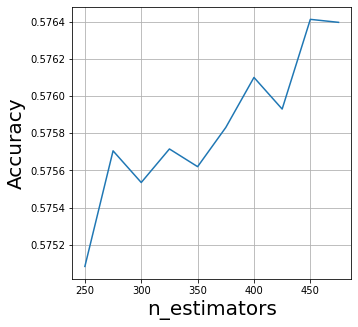

In [183]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize = 20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

In [184]:
rftrainPred = rf0.predict(X0_train)
rftestPred = rf0.predict(X0_test)

In [185]:
rftrainRMSE = np.sqrt(mean_squared_error(y0_train,rftrainPred))
rftestRMSE = np.sqrt(mean_squared_error(y0_test,rftestPred))

In [186]:
RSMEscores = []
#n = list(range(10,250,25))

In [187]:
for x in estimator_range:
  rf0 = RandomForestRegressor(n_estimators=x, bootstrap= True, oob_score=True, random_state=1)
  rf0.fit(X0_train,y0_train) 
  
  rftestPred = rf0.predict(X0_test)
  score = np.sqrt(mean_squared_error(y0_test,rftestPred))
  RSMEscores.append(score)

Text(0, 0.5, 'RSME')

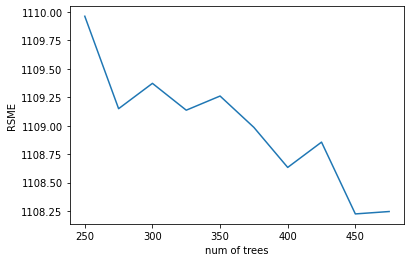

In [188]:
plt.plot(estimator_range,RSMEscores)
plt.xlabel('num of trees')
plt.ylabel('RSME')

In [ ]:
print(estimator_range)

[250, 275, 300, 325, 350, 375, 400, 425, 450, 475]


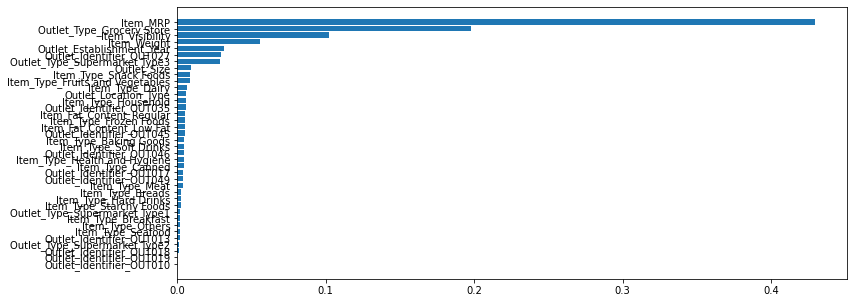

In [ ]:
clf1_features = pd.DataFrame({'feature': X0_train.columns, 'feature_importance': rf0.feature_importances_})
clf1_features.sort_values(by = 'feature_importance', inplace = True)

plt.figure(figsize = (12, 5))
plt.barh(clf1_features['feature'], clf1_features['feature_importance']);

In [ ]:
print(clf1_features['feature_importance'])

26    0.000686
33    0.000868
20    0.002079
19    0.002273
32    0.002826
10    0.003116
24    0.003487
30    0.003905
31    0.004644
22    0.005749
29    0.005763
9     0.005806
16    0.005999
28    0.006193
15    0.006402
25    0.006496
8     0.006970
11    0.008035
18    0.008326
23    0.008925
7     0.010384
4     0.012349
13    0.012372
12    0.013490
6     0.014820
5     0.014827
17    0.015841
21    0.017367
14    0.022880
34    0.035971
3     0.042762
27    0.050665
0     0.081804
1     0.195772
2     0.360148
Name: feature_importance, dtype: float64


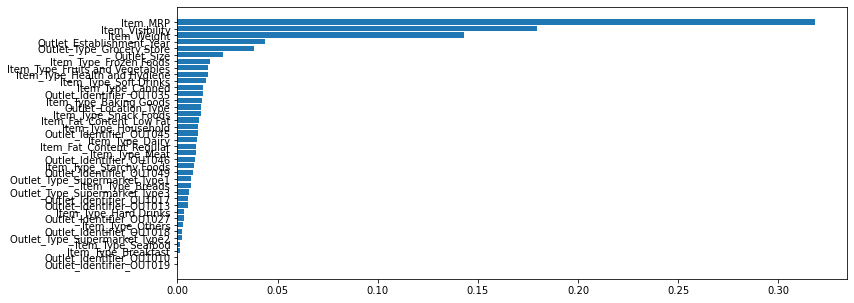

In [ ]:
clf1_features = pd.DataFrame({'feature': X2_train.columns, 'feature_importance': randofour2.feature_importances_})
clf1_features.sort_values(by = 'feature_importance', inplace = True)

plt.figure(figsize = (12, 5))
plt.barh(clf1_features['feature'], clf1_features['feature_importance']);

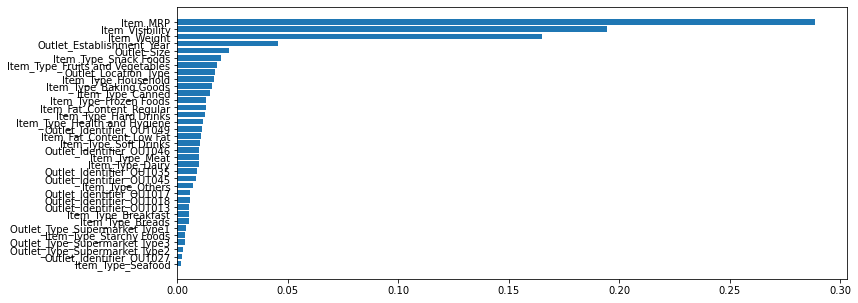

In [ ]:
clf1_features = pd.DataFrame({'feature': X3_train.columns, 'feature_importance': randofour3.feature_importances_})
clf1_features.sort_values(by = 'feature_importance', inplace = True)

plt.figure(figsize = (12, 5))
plt.barh(clf1_features['feature'], clf1_features['feature_importance']);

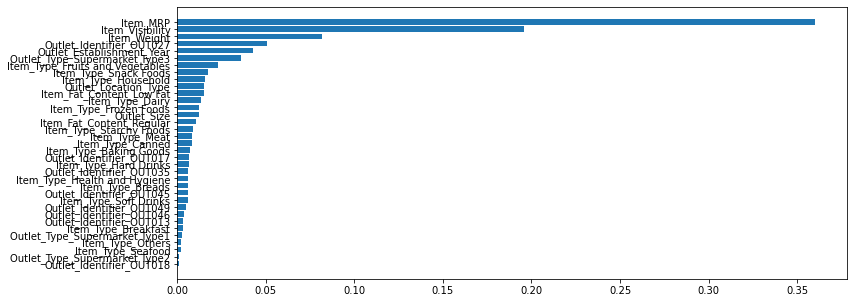

In [ ]:
clf1_features = pd.DataFrame({'feature': X4_train.columns, 'feature_importance': randofour4.feature_importances_})
clf1_features.sort_values(by = 'feature_importance', inplace = True)

plt.figure(figsize = (12, 5))
plt.barh(clf1_features['feature'], clf1_features['feature_importance']);

In [ ]:
from sklearn.linear_model import LinearRegression


In [162]:
scaler = StandardScaler()

scaler.fit(X0_train)
X1_train = scaler.transform(X0_train)
scaler.fit(X0_test)
X1_test = scaler.transform(X0_test)

In [163]:
linear = LinearRegression(fit_intercept=True)
linear.fit(X0_train,y0_train)

scoreLin = linear.score(X0_train,y0_train)
print(scoreLin)
scoreLin = linear.score(X0_test,y0_test)
print(scoreLin)

0.5549380896042776
0.5889016934290021


In [ ]:
linTrainPred = linear.predict(X0_train)
linTestPred = linear.predict(X0_test)

linTrainRMSE = np.sqrt(mean_squared_error(y0_train,linTrainPred))
linTestRMSE = np.sqrt(mean_squared_error(y0_test,linTestPred))

print(linTrainRMSE)
print(linTestRMSE)

1139.1910635457896
1091.7650125769967


KeyError: ignored

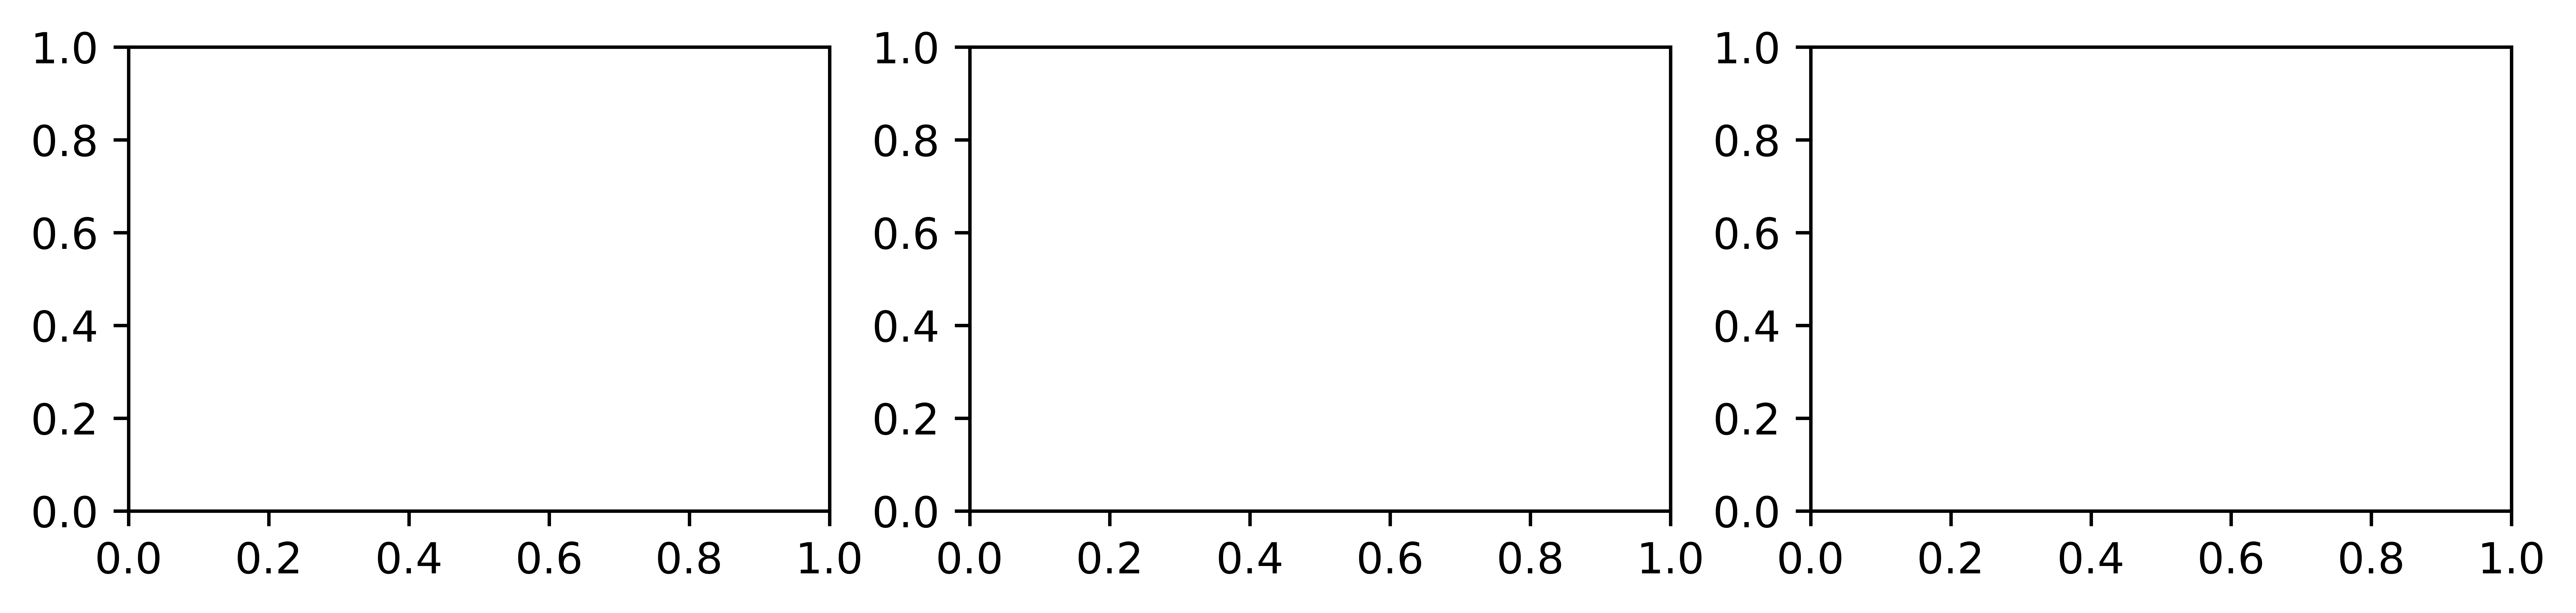

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize= (10,2), dpi=1000)
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=sales, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
# ci stands for confidence interval 95%
# makes scatter plot dots more see through
sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=sales, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x= 'Item_Weight', y='Item_Outlet_Sales', data=sales, ci=None, ax= axes[2], scatter_kws={'alpha':.3});
fig.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
scaler1 = StandardScaler()
scaler1.fit(X1)
X1 = scaler1.transform(X1)

scaler2 = StandardScaler()
scaler2.fit(X2)
X2= scaler2.transform(X2)

scaler3 = StandardScaler()
scaler3.fit(X3)
X3 = scaler3.transform(X3)

scaler4 = StandardScaler()
scaler4.fit(X4)
X4 = scaler4.transform(X4)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 3)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state = 3)

In [ ]:
knn1 = KNeighborsRegressor(n_neighbors = 5)
knn2 = KNeighborsRegressor(n_neighbors = 5)
knn3 = KNeighborsRegressor(n_neighbors = 5)
knn4 = KNeighborsRegressor(n_neighbors = 5)


In [ ]:
knn1.fit(X1_train,y1_train)
knn2.fit(X2_train,y2_train)
knn3.fit(X3_train,y3_train)
knn4.fit(X4_train,y4_train)

In [ ]:
score = knn1.score(X1_test,y1_test)
print(score)

score = knn2.score(X2_test,y2_test)
print(score)

score = knn3.score(X3_test,y3_test)
print(score)

score = knn4.score(X4_test,y4_test)
print(score)

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
X1 = SMType1.loc[:, ['Item_MRP', 'Item_Visibility']]
X2 = SMType2.loc[:, ['Item_MRP', 'Item_Visibility']]
X3 = SMType3.loc[:, ['Item_MRP', 'Item_Visibility']]
X4 = Grocer.loc[:, ['Item_MRP', 'Item_Visibility']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 3)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state = 3)

In [ ]:
breh1 = BaggingRegressor(oob_score=True, random_state=1)
breh2 = BaggingRegressor(oob_score=True, random_state=1)
breh3 = BaggingRegressor(oob_score=True, random_state=1)
breh4 = BaggingRegressor(oob_score=True, random_state=1)

In [ ]:
breh1.fit(X1_train, y1_train)
breh2.fit(X2_train, y2_train)
breh3.fit(X3_train, y3_train)
breh4.fit(X4_train, y4_train)

In [ ]:
score = breh1.score(X1_test,y1_test)
print(score)

score = breh2.score(X2_test,y2_test)
print(score)

score = breh3.score(X3_test,y3_test)
print(score)

score = breh4.score(X4_test,y4_test)
print(score)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize= (10,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
# ci stands for confidence interval 95%
# makes scatter plot dots more see through
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x= 'PTRATIO', y='price', data=df, ci=None, ax= axes[2], scatter_kws={'alpha':.3});
fig.tight_layout()
# to help the charts fit

In [ ]:
y_predict = reg.predict(X[0:])

r2_score(y_actual, y_predict)

mean_absolute_error(y_actual, y_predict)

MSE = mean_squared_error(y_actual, y_predict)
print(MSE)

RMSE = np.sqrt(MSE)

print(RMSE)